In [1]:
from azureml import Workspace
ws = Workspace()
experiment = ws.experiments['3440f0fd53fb43e8be86ef49b6537593.f-id.853ecda282a44a0494526022600bcc97']
ds = experiment.get_intermediate_dataset(
    node_id='c7188cd9-2dae-4afc-91de-eaf997a6d661-90104',
    port_name='Results dataset',
    data_type_id='GenericCSV'
)
flightDataframe = ds.to_dataframe()

In [2]:
flightDataframe.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,...,ArrDelay,ArrDel15,Cancelled,city,state,name,airport_id,city (2),state (2),name (2)
0,2013,4,19,5,DL,11433,13303,837,-3,0.0,...,1,0,0,Detroit,MI,Detroit Metro Wayne County,13303,Miami,FL,Miami International
1,2013,4,19,5,DL,14869,12478,1705,0,0.0,...,-8,0,0,Salt Lake City,UT,Salt Lake City International,12478,New York,NY,John F. Kennedy International
2,2013,4,19,5,DL,14057,14869,600,-4,0.0,...,-15,0,0,Portland,OR,Portland International,14869,Salt Lake City,UT,Salt Lake City International
3,2013,4,19,5,DL,15016,11433,1630,28,1.0,...,24,1,0,St. Louis,MO,Lambert-St. Louis International,11433,Detroit,MI,Detroit Metro Wayne County
4,2013,4,19,5,DL,11193,12892,1615,-6,0.0,...,-11,0,0,Cincinnati,OH,Cincinnati/Northern Kentucky International,12892,Los Angeles,CA,Los Angeles International


In [3]:
flightDataframe.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled,airport_id
count,2719397.0,2.719397e+06,2.719397e+06,2.719397e+06,2.719397e+06,2.719397e+06,2.719397e+06,2.719397e+06,2.691956e+06,2.719397e+06,2.719397e+06,2.719397e+06,2.719397e+06,2.719397e+06
mean,2013.0,6.979968e+00,1.579747e+01,3.898389e+00,1.274226e+04,1.274246e+04,1.326647e+03,1.043062e+01,2.023432e-01,1.505272e+03,6.566923e+00,2.166318e-01,1.067516e-02,1.274246e+04
std,0.0,1.984330e+00,8.799863e+00,1.985988e+00,1.501976e+03,1.501968e+03,4.713755e+02,3.593247e+01,4.017468e-01,4.939662e+02,3.844812e+01,4.119497e-01,1.027677e-01,1.501968e+03
min,2013.0,4.000000e+00,1.000000e+00,1.000000e+00,1.014000e+04,1.014000e+04,1.000000e+00,-6.300000e+01,0.000000e+00,1.000000e+00,-9.400000e+01,0.000000e+00,0.000000e+00,1.014000e+04
25%,2013.0,5.000000e+00,8.000000e+00,2.000000e+00,1.129200e+04,1.129200e+04,9.200000e+02,-4.000000e+00,0.000000e+00,1.120000e+03,-1.100000e+01,0.000000e+00,0.000000e+00,1.129200e+04
50%,2013.0,7.000000e+00,1.600000e+01,4.000000e+00,1.289200e+04,1.289200e+04,1.320000e+03,-1.000000e+00,0.000000e+00,1.528000e+03,-3.000000e+00,0.000000e+00,0.000000e+00,1.289200e+04
75%,2013.0,9.000000e+00,2.300000e+01,6.000000e+00,1.405700e+04,1.405700e+04,1.725000e+03,9.000000e+00,0.000000e+00,1.918000e+03,1.000000e+01,0.000000e+00,0.000000e+00,1.405700e+04
max,2013.0,1.000000e+01,3.100000e+01,7.000000e+00,1.537600e+04,1.537600e+04,2.359000e+03,1.863000e+03,1.000000e+00,2.359000e+03,1.845000e+03,1.000000e+00,1.000000e+00,1.537600e+04


In [4]:
flightDataframe.ArrDelay.describe()

count    2.719397e+06
mean     6.566923e+00
std      3.844812e+01
min     -9.400000e+01
25%     -1.100000e+01
50%     -3.000000e+00
75%      1.000000e+01
max      1.845000e+03
Name: ArrDelay, dtype: float64

'ArrDelay'

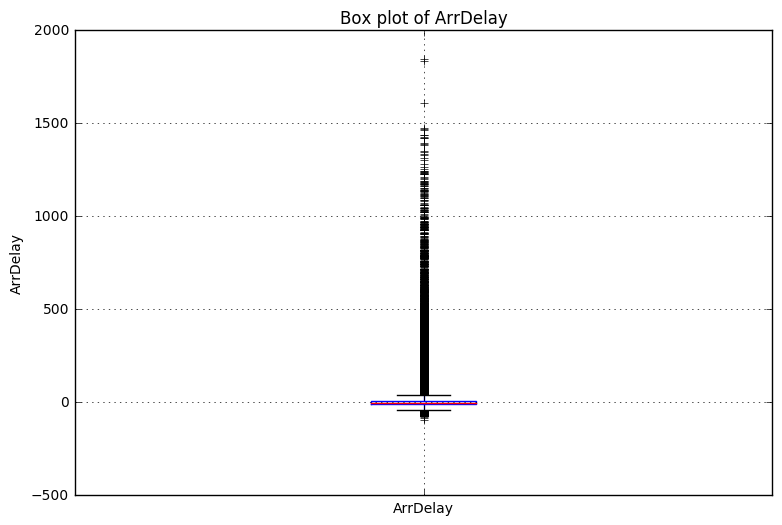

In [5]:
%matplotlib inline

def boxplot(df,col):
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = col, ax = ax)
    ax.set_title('Box plot of ' + col)
    ax.set_ylabel(col)
    return col

# Basic boxplot of a single column.
boxplot(flightDataframe, "ArrDelay")

'ArrDelay'

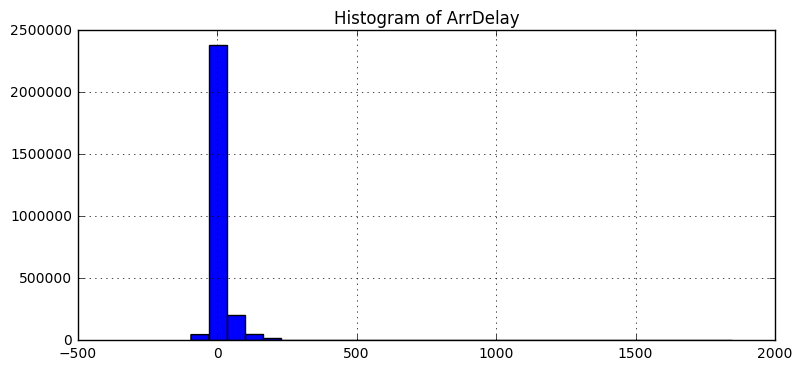

In [6]:
def histplot(df,col):
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(9, 4))
    ax = fig.gca()
    df.hist(column = col, ax = ax, bins = 30)
    ax.set_title('Histogram of ' + col)
    return col
    
# Basic histogram of a single column.
histplot(flightDataframe, "ArrDelay")

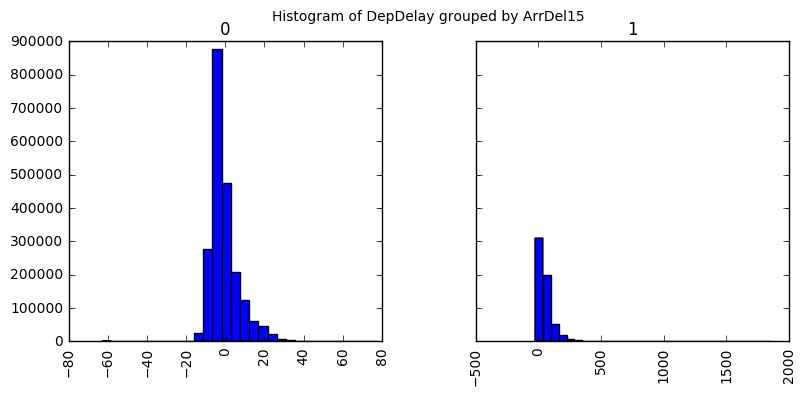

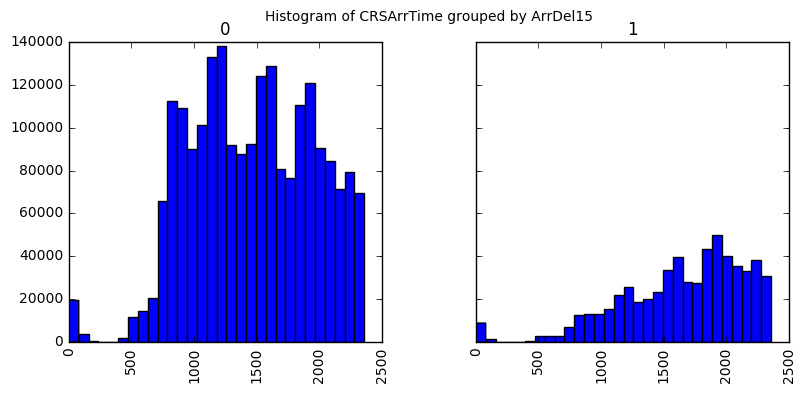

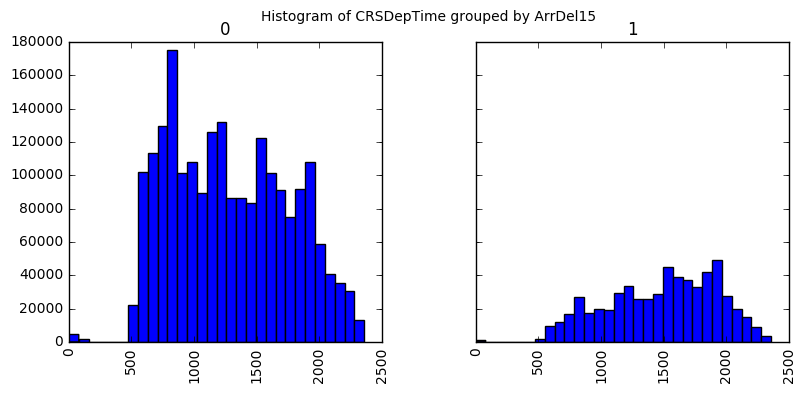

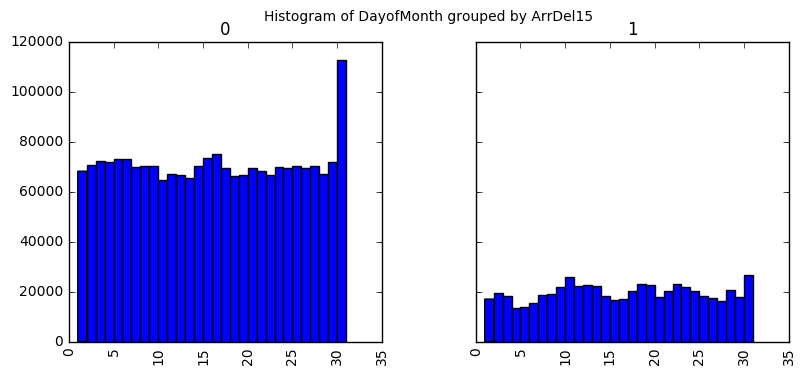

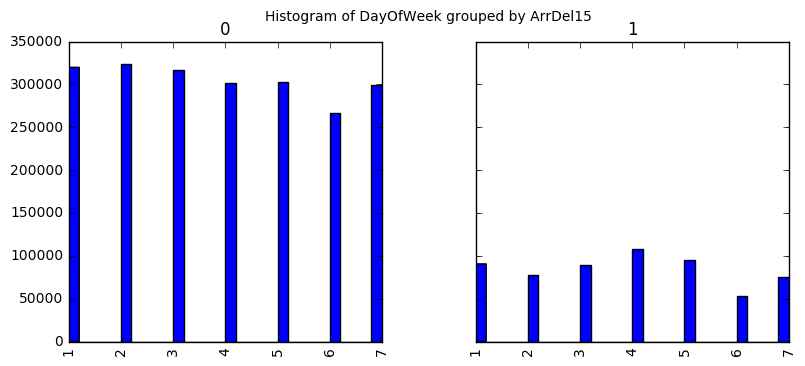

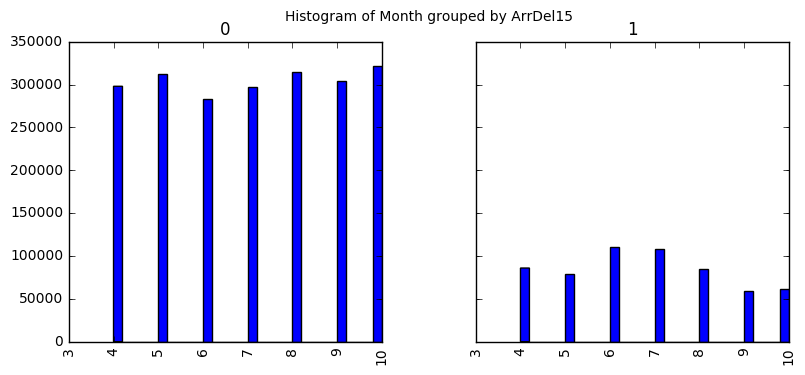

In [7]:
    def groupedhistplot (df, col, groupcol):
        import matplotlib.pyplot as plt
        #Use sharey to make it easier to compare different histograms side-by-side.
        df.hist(column = col, sharey = True, by = groupcol, bins = 30, figsize = [9,4])
        plt.suptitle('Histogram of ' + col + ' grouped by ' + groupcol)
        return

    # Histogram by groups
    groupedhistplot(flightDataframe, 'DepDelay', 'ArrDel15')
    groupedhistplot(flightDataframe, 'CRSArrTime', 'ArrDel15')
    groupedhistplot(flightDataframe, 'CRSDepTime', 'ArrDel15')
    groupedhistplot(flightDataframe, 'DayofMonth', 'ArrDel15')
    groupedhistplot(flightDataframe, 'DayOfWeek', 'ArrDel15')
    groupedhistplot(flightDataframe, 'Month', 'ArrDel15')



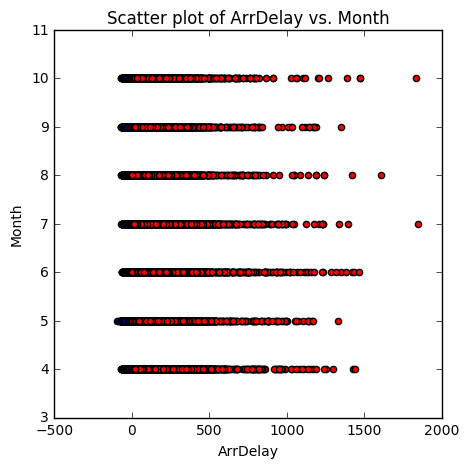

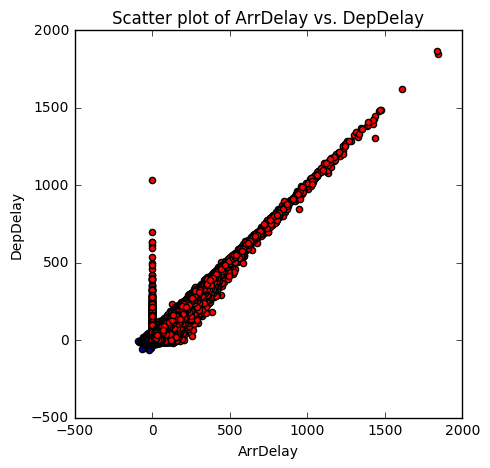

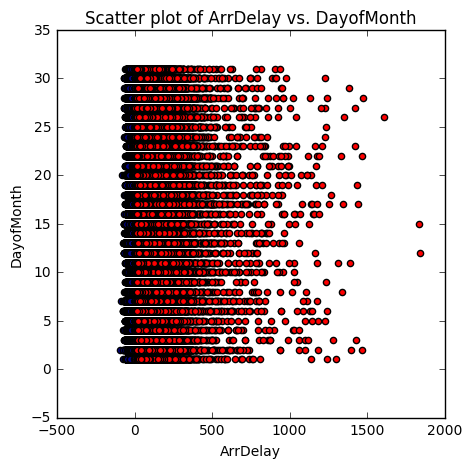

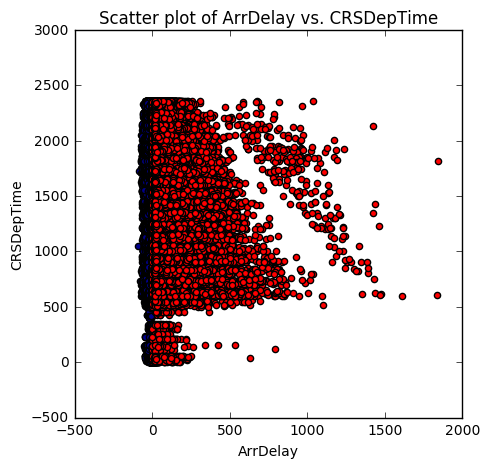

In [8]:
# Grouped scatter plot by group.
def scatterplot(df, xcol, ycol, groupcol):
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(5, 5))
    ax = fig.gca()
    
    # The second parameter to limit columns on result isn't obligatory
    # but makes things faster by reducing the subdataframe size.
    tempDf0 = df.loc[df[groupcol] == 0, [xcol, ycol, groupcol]]
    tempDf1 = df.loc[df[groupcol] == 1, [xcol, ycol, groupcol]]
    if tempDf0.shape[0] > 0:                    
        tempDf0.plot(kind = 'scatter', x = xcol, y = ycol, 
                   ax = ax, color = 'DarkBlue')                          
    if tempDf1.shape[0] > 0:                    
        tempDf1.plot(kind = 'scatter', x = xcol, y = ycol,
                       ax = ax, color = 'Red')
    ax.set_title('Scatter plot of ' + xcol + ' vs. ' + ycol)
    return
    
scatterplot(flightDataframe, 'ArrDelay', 'Month', 'ArrDel15')
scatterplot(flightDataframe, 'ArrDelay', 'DepDelay', 'ArrDel15')
scatterplot(flightDataframe, 'ArrDelay', 'DayofMonth', 'ArrDel15')
scatterplot(flightDataframe, 'ArrDelay', 'CRSDepTime', 'ArrDel15')


In [17]:
flightDataframe.loc[flightDataframe['ArrDel15'] == 0].shape[0]

2130289

In [18]:
flightDataframe.loc[flightDataframe['ArrDel15'] == 1].shape[0]

589108

In [19]:
flightDataframe.shape[0]

2719397